In [38]:
import matplotlib
import pandas as pd
from sklearn.model_selection import ShuffleSplit
 
# import some data to play with
hs_2017=pd.read_csv("hs_2017.csv")

if 'sat_high_level' in hs_2017:
    y=hs_2017['sat_high_level'].values
    del hs_2017['sat_high_level']
    X=hs_2017.values

num_cv_iterations = 3
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

print(cv_object)


ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

iter_num=0
for train_indices, test_indices in cv_object.split(X,y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train,y_train)
    y_hat = lr_clf.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.8117647058823529
confusion matrix
 [[35 11]
 [ 5 34]]
====Iteration 1  ====
accuracy 0.8352941176470589
confusion matrix
 [[47  6]
 [ 8 24]]
====Iteration 2  ====
accuracy 0.8588235294117647
confusion matrix
 [[44  5]
 [ 7 29]]


In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.92941176 0.87058824 0.85882353]


In [41]:
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

In [42]:
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = hs_2017.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

Unnamed: 0 has weight of -0.00827928807151803
sat_avg_score_num has weight of 0.2690277294794352
ACTMath_ACTBenchmark_All has weight of 0.045065174422659525
ACTScience_ACTBenchmark_All has weight of 0.057578490814261016
ACTMath_ACTBenchmark_Female has weight of 0.017744705798599984
ACTScience_ACTBenchmark_Female has weight of 0.0745587191305215
ACTReading_ACTBenchmark_Female has weight of 0.013892689290964069
ACTEnglish_ACTBenchmark_Female has weight of -0.022441632412594382
ACTMath_ACTBenchmark_Male has weight of 0.06462411590312471
ACTScience_ACTBenchmark_Male has weight of 0.05184242644379661
ACT Score has weight of -0.046849860130055654
Gr_9_Pct_Prof has weight of -0.07382445689888795
ACTCompositeScore_UNCMin_Female has weight of -0.0166859501675534
ACTWriting_ACTBenchmark_All has weight of -0.009510769680854547
EOCSubjects_CACR_All has weight of -0.03399556191735549
ACTMath_ACTBenchmark_White has weight of 0.02818369889550542
SPG Score has weight of -0.12411686571117511
EOCMathI_C

In [43]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,hs_2017.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.8941176470588236
[[43  6]
 [ 3 33]]
ACTWorkKeys_SilverPlus_Hispanic has weight of -0.18274506147725378
GraduationRate_5yr_All has weight of -0.17119049567388353
EVAAS Growth Status_NotMet has weight of -0.16877688119413628
Unnamed: 0 has weight of -0.16424676715441783
ACTCompositeScore_UNCMin_AIG has weight of -0.15573495426690812
ACTWorkKeys_SilverPlus_Asian has weight of -0.1536398671240324
EOCSubjects_CACR_AIG has weight of -0.15317699384325506
lea_short_susp_per_c_num has weight of -0.14338404298192464
MinorityFemalePct has weight of -0.13862794398392542
EOCBiology_CACR_Hispanic has weight of -0.13019359033172534
lea_wap_per_classroom has weight of -0.12946348635941946
ACTWriting_ACTBenchmark_AmericanIndian has weight of -0.1290798733688231
SPG Grade_B has weight of -0.12454450909708631
EOCEnglish2_CACR_TwoorMoreRaces has weight of -0.12433267533782753
EOCEnglish2_CACR_AIG has weight of -0.12162323458151908
EOCSubjects_GLP_LEP has weight of -0.12022488267053913
EOG/EOCS

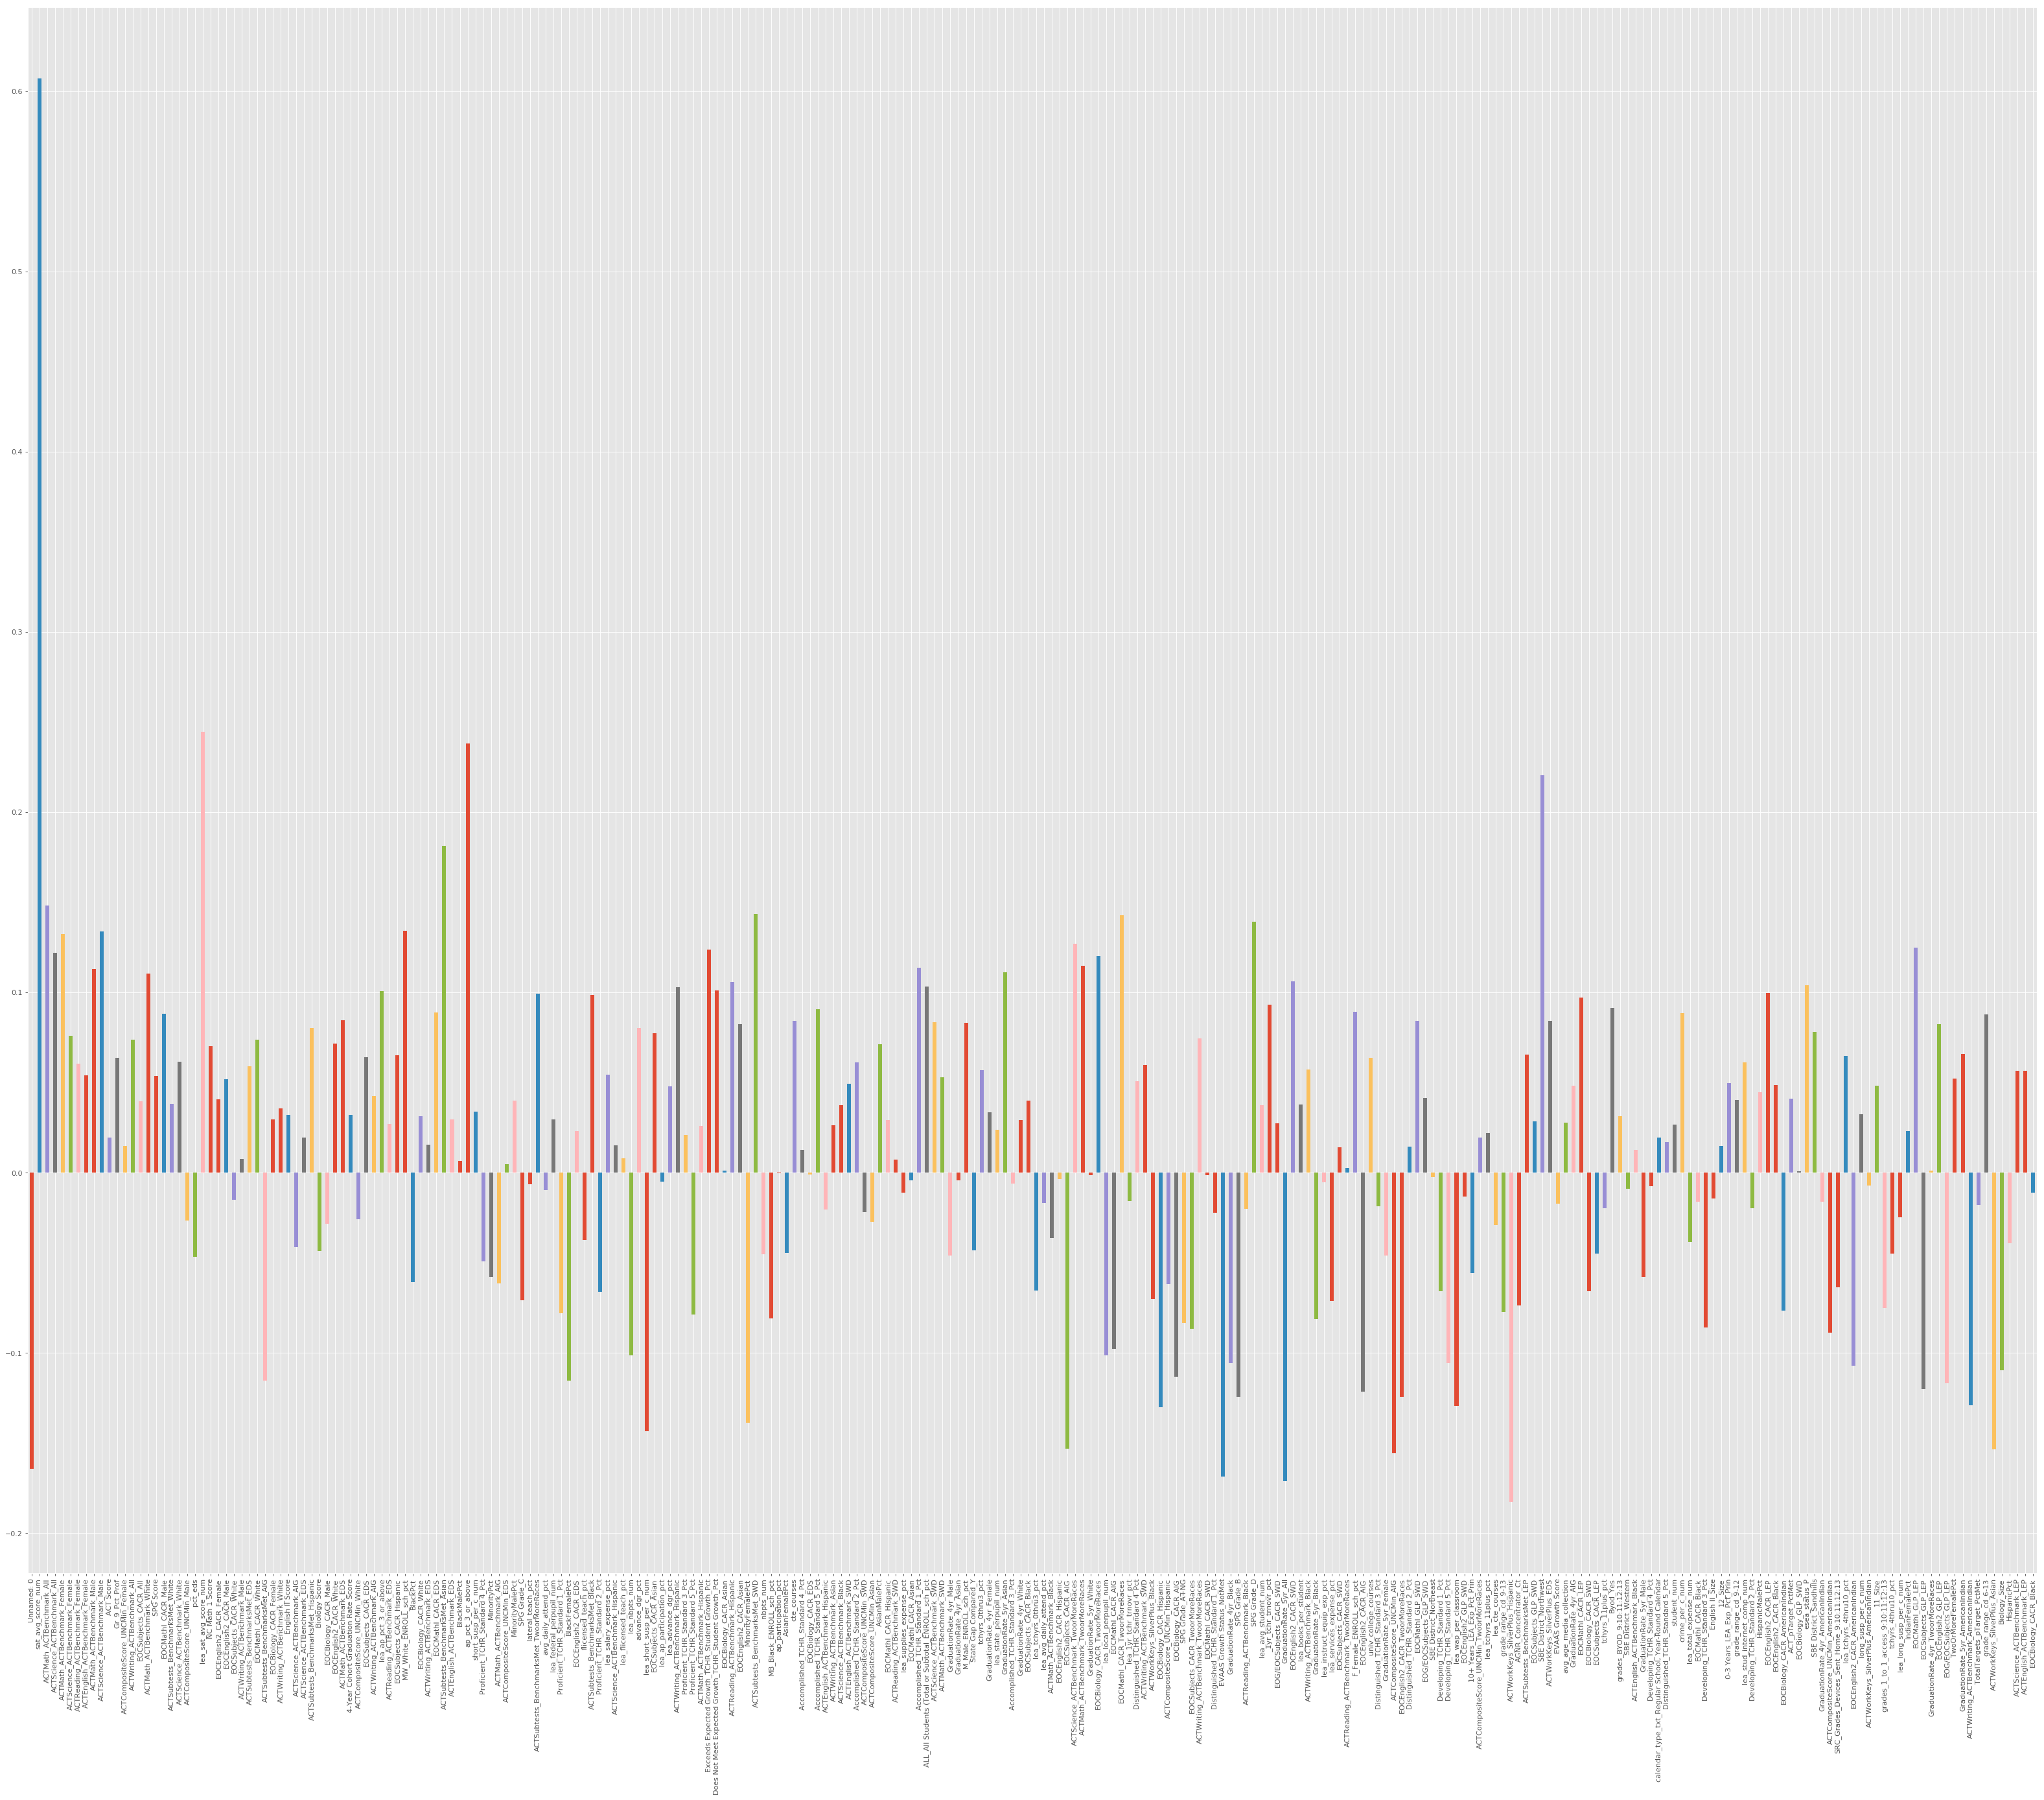

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=hs_2017.columns)

fig=plt.figure(figsize=(50, 40), dpi= 80, facecolor='w', edgecolor='k')
weights.plot(kind='bar')

plt.show()

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    # it is a little odd getting trained objects from a  pipeline:
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)

### SVM HERE

In [29]:
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [30]:
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.9294117647058824
[[56  3]
 [ 3 23]]


In [31]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(206, 258)
(206,)
[102 104]


In [57]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = hs_2017.loc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.loc[svm_clf.support_,:]

df_support['sat_high_level'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
hs_2017['sat_high_level'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 335
Columns: 259 entries, Unnamed: 0 to sat_high_level
dtypes: float64(259)
memory usage: 418.4 KB


d:\programfiles\python36\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


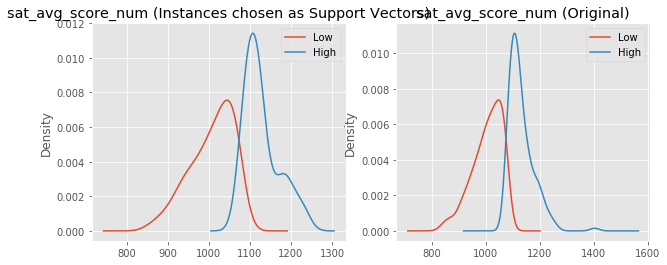

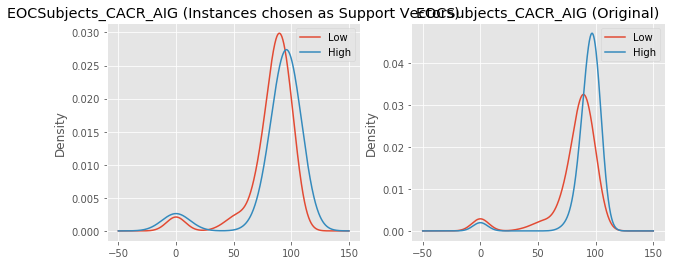

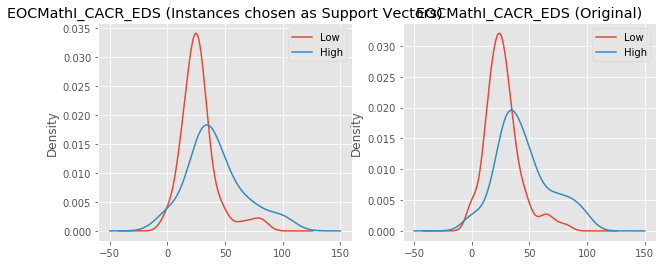

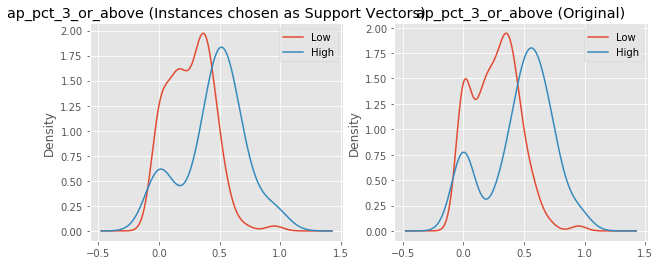

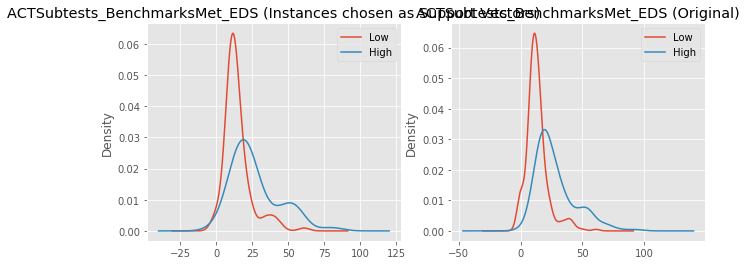

In [63]:
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['sat_high_level'])
df_grouped = hs_2017.groupby(['sat_high_level'])

# plot KDE of Different variables
vars_to_plot = ['sat_avg_score_num','EOCSubjects_CACR_AIG', 'EOCMathI_CACR_EDS', 'ap_pct_3_or_above', 'ACTSubtests_BenchmarksMet_EDS']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Low','High'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Low','High'])
    plt.title(v+' (Original)')

ValueError: X.shape[1] = 2 should be equal to 258, the number of features at training time

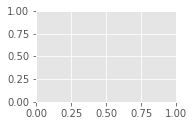